In [1]:
import pandas as pd
import math 
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from deepdiff import DeepDiff
from sklearn.mixture import GaussianMixture

### 1. Análisis Inicial

In [3]:
df = pd.read_csv (r'./normales.csv')
print(df.shape)
df = df.to_numpy()

(46, 2)


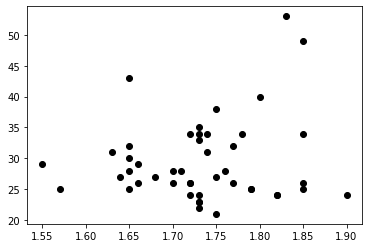

In [12]:
plt.plot(df[:,0], df[:,1], 'o', color='black')

### 2. Implementación manual de Kmeans

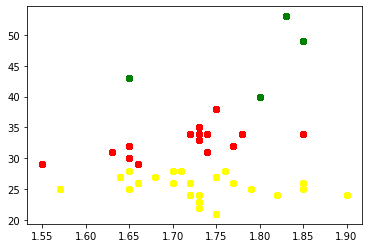

In [11]:
fc = np.array(test[0])
sc = np.array(test[1])
tc = np.array(test[2])

plt.plot(fc[:,0], fc[:,1], 'o', color='green')
plt.plot(sc[:,0], sc[:,1], 'o', color='yellow')
plt.plot(tc[:,0], tc[:,1], 'o', color='red')
plt.show()

In [10]:
test = kmeans(3, df)

In [9]:
def kmeans(K, x):
    
    k = K
    samples = len(x)
    clusters = {}
    centroids = {}

    ##initiating centroids
    centroids_index = random.sample(range(0, samples), k)
    for i in range(k):
        centroids[i] = x[centroids_index[i]]
        clusters[i] = []

    #print("Initial Centroids: ")
    #print(centroids)  
    
    for l in range(1000):          

        for data in x:
            euc_dist = []
            for j in range(k):
                euc_dist.append(np.linalg.norm(data - centroids[j]))
            clusters[euc_dist.index(min(euc_dist))].append(data)
        
        centroids_aux = recalculate_centroids(centroids, clusters, k)
        ##print(centroids_aux)
        
        ##CHEQUEAR SI SON DIFERENTES LOS CENTROIDES RECALCULADOS
        diff = DeepDiff(centroids, centroids_aux)
        
        if(diff):
            centroids = centroids_aux
        else: 
            print("reached convergence.." + str(l))
            break 
            
    return clusters 


In [261]:
def calculateDistance(x1,x2):
    dist = math.sqrt((x2[0]- x1[0])**2 + (x2[1] - x1[1])**2)
    return dist

In [8]:
def recalculate_centroids(c, clusters, k):
    """ Recalculates the centroid position based on the plot """
    caux = c.copy()
    
    for i in range(k):
        caux[i] = np.average(clusters[i], axis=0)
    return caux

### 3. Comparación con el algoritmo de SKLEARN

De acuerdo al análisis realizado en la sección 5, el número ideal de clusters para este problema es K = 3. 

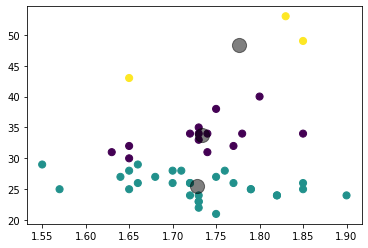

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

plt.scatter(df[:, 0], df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

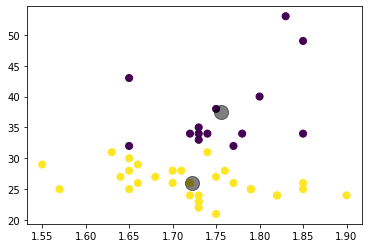

In [9]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

plt.scatter(df[:, 0], df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

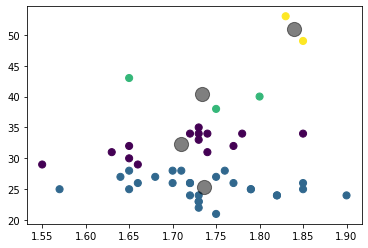

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

plt.scatter(df[:, 0], df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

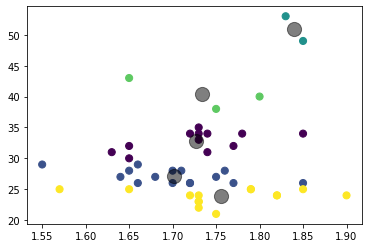

In [11]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

plt.scatter(df[:, 0], df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

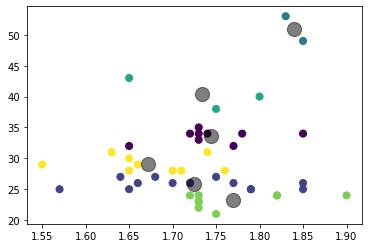

In [12]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

plt.scatter(df[:, 0], df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### 4. Gaussian Mixture Model

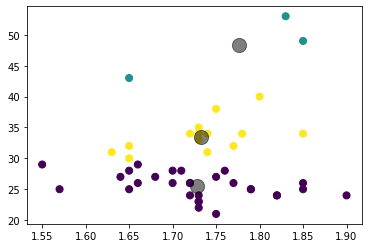

In [5]:
gm = GaussianMixture(n_components=3, random_state=0)
gm.fit(df)
y_gm = gm.predict(df)

plt.scatter(df[:, 0], df[:, 1], c=y_gm, s=50, cmap='viridis')

centers = gm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### 5. Elbow analysis 

In [6]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

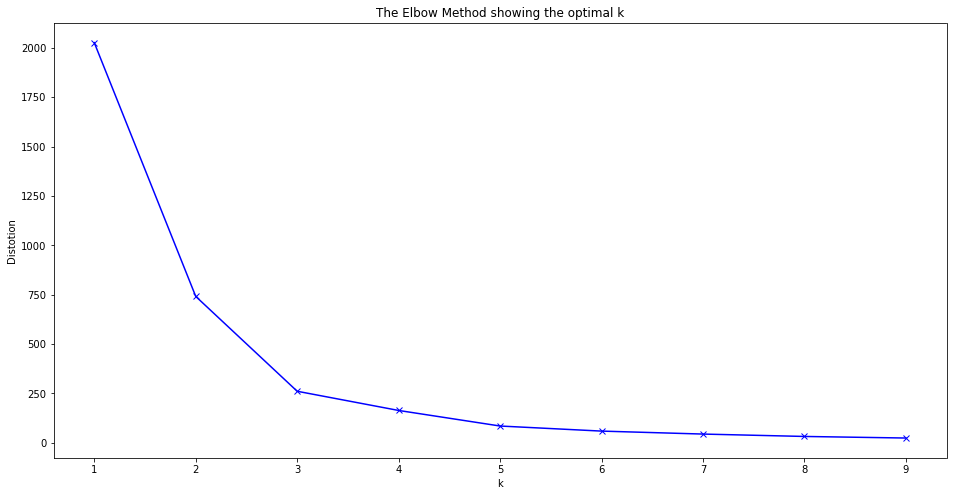

In [8]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distotion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

De este análisis se puede observar que el valor optimo para este problema se encuentra en K = 3. Por lo tanto de las pruebas realizadas en la sección 3, se acepta la primera prueba como la más eficiente. El algortimo de Gaussian Mixture Model se realizó con el mismo valor para K = 3 (Sección 4). Del análisis del los clusters encontrados se puede determinar que el algoritmo realiza una clasificación en base a la edad. Divide las muestras en tres grupos: Jovenes(∼25 años), adultos(∼45 años) y edad media (∼35 años).

### 6. Valtest normales

In [14]:
df2 = pd.read_csv (r'./valtest(normales).csv')
print(df2.shape)
df2 = df2.to_numpy()

(8, 2)


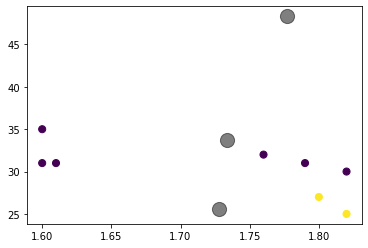

In [18]:
y_kmeans2 = kmeans.predict(df2)
plt.scatter(df2[:, 0], df2[:, 1], c=y_kmeans2, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Las observaciones son clasificadas como jovenes y edad media. No se encontraron adultos mayores. 

### Probabilidad de pertertenecer a cada cluster

In [19]:
y_gm_proba = gm.predict_proba(df2)
y_gm_proba

array([[9.99992415e-01, 1.02546836e-36, 7.58509458e-06],
       [9.98461524e-01, 4.42003078e-29, 1.53847647e-03],
       [4.64402866e-01, 2.66373681e-07, 5.35596868e-01],
       [1.23393764e-02, 2.70463994e-02, 9.60614224e-01],
       [5.30902848e-01, 1.44381263e-22, 4.69097152e-01],
       [4.97945508e-03, 5.09227334e-15, 9.95020545e-01],
       [5.22175109e-02, 1.50538348e-18, 9.47782489e-01],
       [3.74740565e-01, 8.38139893e-08, 6.25259351e-01]])

### Prueba con 1,000 muestras

In [37]:
sampl_edades = np.random.randint(low=21, high=53, size=(1000,))
sampl_estatura = np.random.randint(160, 190, size=(1000,)).astype("float") / 100
samples = np.column_stack((sampl_estatura, sampl_edades))

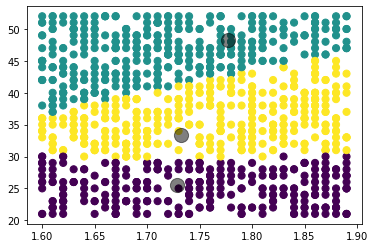

In [38]:
y_gm_samples = gm.predict(samples)

plt.scatter(samples[:, 0], samples[:, 1], c=y_gm_samples, s=50, cmap='viridis')

centers = gm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [46]:
f = estatura_edad(samples)
np.mean(f)

0.05071220633864928

In [44]:
def estatura_edad(X):
    return X[:,0]/X[:,1]